Definition of variables for reusability

In [0]:
fileroot1 = 'clinicaltrial_2021'
fileroot2 = 'pharma'
year = '2021'

Importation of useful functions for this implementation and visualization.

In [0]:
%pip install bokeh


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import calendar
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.embed import components, file_html
from bokeh.resources import CDN
from bokeh.core.properties import value
from matplotlib import pyplot as plt

Exlporation and running of RDD transformation.

Creation of RDD for both files (clinicaltrials and pharma) using two different methods.

Method 1 : Using "sc.textFile" function.

In [0]:
# For clinicaltrial

myclinicaltrialRDD = sc.textFile("/FileStore/tables/"+fileroot1+".csv")
myclinicaltrialRDD.take(5)

['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

In [0]:
# For pharma
mypharmaRDD = sc.textFile("/FileStore/tables/"+fileroot2+".csv")
mypharmaRDD.take(10)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
# Method 2 : Creating from existing DataFrame

In [0]:
# For clinicaltrial

file_location = "/FileStore/tables/"+fileroot1+".csv"
file_type = "csv"
 
infer_schema = "True"
first_row_is_header = "True"
delimiter = "|"
 
clinicaltrial_DF = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/"+fileroot1+".csv")
 
myclinicaltrialRDD1=clinicaltrial_DF.rdd
myclinicaltrialRDD1.take(5)

[Row(Id='NCT02758028', Sponsor='The University of Hong Kong', Status='Recruiting', Start='Aug 2005', Completion='Nov 2021', Type='Interventional', Submission='Apr 2016', Conditions=None, Interventions=None),
 Row(Id='NCT02751957', Sponsor='Duke University', Status='Completed', Start='Jul 2016', Completion='Jul 2020', Type='Interventional', Submission='Apr 2016', Conditions='Autistic Disorder,Autism Spectrum Disorder', Interventions=None),
 Row(Id='NCT02758483', Sponsor='Universidade Federal do Rio de Janeiro', Status='Completed', Start='Mar 2017', Completion='Jan 2018', Type='Interventional', Submission='Apr 2016', Conditions='Diabetes Mellitus', Interventions=None),
 Row(Id='NCT02759848', Sponsor='Istanbul Medeniyet University', Status='Completed', Start='Jan 2012', Completion='Dec 2014', Type='Observational', Submission='May 2016', Conditions='Tuberculosis,Lung Diseases,Pulmonary Disease', Interventions=None),
 Row(Id='NCT02758860', Sponsor='University of Roma La Sapienza', Status='A

In [0]:
# For pharma

file_location = "/FileStore/tables/"+fileroot2+".csv"
file_type = "csv"
 
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
 
pharma_DF = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/"+fileroot2+".csv")
 
mypharmaRDD1=pharma_DF.rdd
mypharmaRDD1.take(5)

[Row(Company='Abbott Laboratories', Parent_Company='Abbott Laboratories', Penalty_Amount='$5,475,000', Subtraction_From_Penalty='$0', Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting='$5,475,000', Penalty_Year=2013, Penalty_Date=20131227, Offense_Group='government-contracting-related offenses', Primary_Offense='False Claims Act and related', Secondary_Offense='kickbacks and bribery', Description="Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.", Level_of_Government='federal', Action_Type='agency action', Agency='Justice Department Civil Division', Civil/Criminal='civil', Prosecution_Agreement=None, Court=None, Case_ID=None, Private_Litigation_Case_Title=None, Lawsuit_Resolution=None, Facility_State=None, City=None, Address=None, Zip=None, NAICS_Code=None, NAICS_Translation=None, HQ_Country_of_Parent='USA', H

In [0]:
# Removing the header from the files



In [0]:
header1 = myclinicaltrialRDD.first()
Headerfileroot1RDD = myclinicaltrialRDD.filter(lambda line: line!= header1)
Headerfileroot1RDD.take(5)

['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|']

In [0]:
header2 = mypharmaRDD.first()
Headerfileroot2RDD = mypharmaRDD.filter(lambda line: line!= header2)
Headerfileroot2RDD.take(10)

['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5

In [0]:
# Counting the number of distinct studies in the dataset

In [0]:
Headerfileroot1RDD.distinct().count()

387261

In [0]:
 # Listing all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type, ordered from most frequent to least frequent.

In [0]:
Splitfileroot1RDD = Headerfileroot1RDD.map(lambda x: (x.split ("|")))


In [0]:
Typefileroot1RDD= Splitfileroot1RDD.map(lambda a: (a[5],int(1))).reduceByKey(lambda a, b: a+b)\
.sortBy(lambda a: a[1], ascending=False)
Typefileroot1RDD.collect()

[('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
# The top 5 conditions (from Conditions) with their frequencies.



In [0]:
fileroot1ConditionRDD= Splitfileroot1RDD.map(lambda a: (a[7]))\
.flatMap(lambda x: (x.split(",")))
fileroot1ConditionRDD.take(10)

['',
 'Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases',
 'Pulmonary Disease',
 'Diverticular Diseases',
 'Diverticulum',
 'Diverticulosis']

In [0]:
# Applying lambda function to filter the conditions so as to remove the empty spaces, apply mapping and reduceByKey so as to sort in descending order 

In [0]:
EmptySpace= ['']
Filterfileroot1ConditionRDD=fileroot1ConditionRDD.filter(lambda x: x not in EmptySpace)\
.map(lambda a: (a,1))\
.reduceByKey(lambda a, b: a+b)\
.sortBy(lambda a: a[1], ascending=False)
Filterfileroot1ConditionRDD.take(5)

[('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
# To visualise the top five conditions with their frequencies.



In [0]:

output_file("bars.html")
 
root = Filterfileroot1ConditionRDD.map(lambda a: a[0]).take(5)
Count = Filterfileroot1ConditionRDD.map(lambda a: a[1]).take(5)

p=figure(x_range=root, min_width=500, height=500, title="Five Most Frequent Roots",
           toolbar_location=None, tools="")
 
p.vbar(x=root, top=Count, width=0.7)
 
p.xgrid.grid_line_color = None
p.y_range.start = 0
 
html = file_html(p, CDN, "bar")
displayHTML(html)


<!DOCTYPE html>
 
 
 
 bar

In [0]:
# To find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. 

In [0]:
#First, pharma RDD is split by the delimiter "," , then mapped and reducedByKey



In [0]:
Finalfileroot2RDD= Headerfileroot2RDD.map(lambda line: line.replace('"','').split(',')[1])\
.map(lambda a: (a,1))\
.reduceByKey(lambda a,b: a+b)
Finalfileroot2RDD.take(10)

[('Abbott Laboratories', 26),
 ('AbbVie', 38),
 (' LLC', 26),
 ('AstraZeneca', 22),
 ('Sanofi', 24),
 ('AVEO Pharmaceuticals', 1),
 ('Bausch Health', 11),
 ('GlaxoSmithKline', 31),
 ('Teva Pharmaceutical Industries', 36),
 ('Merck', 64)]

In [0]:
# Joining the both files ( the clinicaltrial file with the pharma file), then reducingByKey to obtain their frequencies and sorting in descending order

In [0]:
Sponsorfileroot1MapRDD= Splitfileroot1RDD.map(lambda a:a[1])\
.map(lambda a: (a,1))\
.reduceByKey(lambda a,b: a+b)\
.subtractByKey(Finalfileroot2RDD)\
.sortBy(lambda a: a[1], ascending=False)
Sponsorfileroot1MapRDD.take(10)

[('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
# Visualising the ten most common sponsors using the imported matplot.



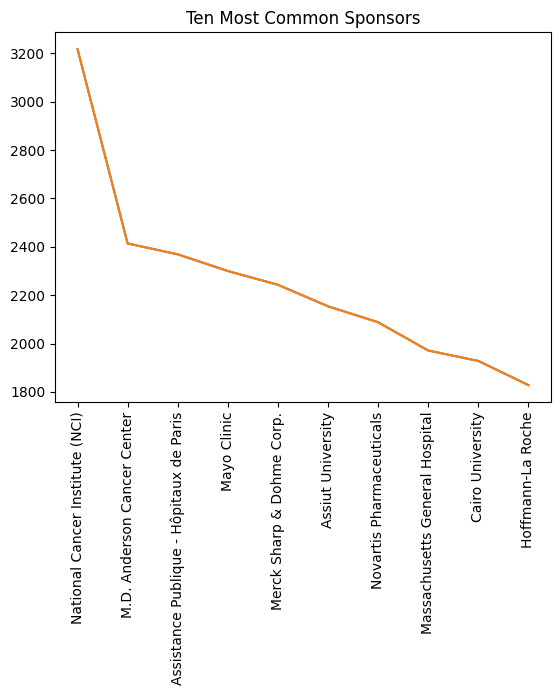

In [0]:
 # Data initializing
    
x = Sponsorfileroot1MapRDD.map(lambda a: a[0]).take(10)
y = Sponsorfileroot1MapRDD.map(lambda a: a[1]).take(10)
   # plotting the data
plt.plot(x, y)
   # Adding the title
plt.title("Ten Most Common Sponsors")
   # Adding the labels 
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()

In [0]:
# To plot number of completed studies each month in a given year, including visualization as well as a table of all the values that have been plotted for each month.

In [0]:
# First, the split clinicaltrial's RDD is filtered and mapped so as to obtain the studies completed in the year in question, and reducedByKey function is applied futher to obtain the counts in each month.  

In [0]:
Month_by_MonthRDD= Splitfileroot1RDD.map(lambda a: (a[2],a[4]))\
.filter(lambda a: year in a[1])\
.filter(lambda a: 'Completed' in a[0])\
.map(lambda a: (a[1],1))\
.reduceByKey(lambda a, b: a+b)\
.map(lambda a: (a[0].split(' ')[0],a[1]))\
.sortByKey(ascending = False)\
.map(lambda a: (a[0],a[1]))
Month_by_MonthRDD.take(12)

[('Sep', 528),
 ('Oct', 187),
 ('May', 984),
 ('Mar', 1227),
 ('Jun', 1094),
 ('Jul', 819),
 ('Jan', 1131),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967)]

In [0]:
# To sort the months chronologically, the imported callender is used

In [0]:
d = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}
 
#{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
#'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
 
MonthlyRDD=Month_by_MonthRDD.sortBy(keyfunc=lambda x: d.get(x[0]))
MonthlyRDD.collect()

[('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
#Visualization of the number of complteted studies by month

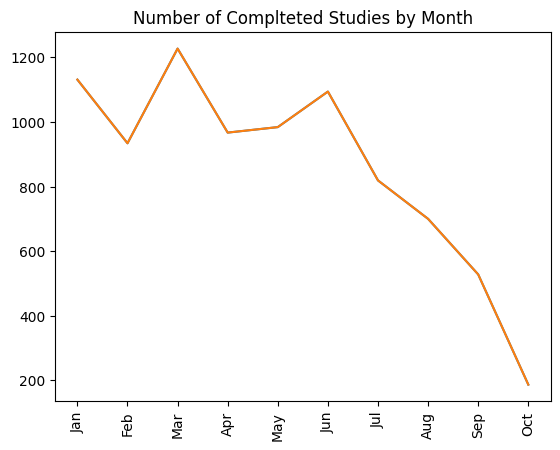

In [0]:
x = MonthlyRDD.map(lambda a: a[0]).take(10)
y = MonthlyRDD.map(lambda a: a[1]).take(10)
   # plotting the data
plt.plot(x, y)
   # Adding the title
plt.title("Number of Complteted Studies by Month")
   # Adding the labels 
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()

In [0]:
# To find the overall top 10 most common sponsors and the number of clinical trials they have sponsored. 

In [0]:
#Map transformation of the sponsor data in the clinicaltrial table, and a second tranformation to create a key value pair RDD, with application of reduceByKey funtion and sorting result in descending order.
Sponsorfileroot1MapRDD= Splitfileroot1RDD.map(lambda a:a[1])\
.map(lambda a: (a,1))\
.reduceByKey(lambda a,b: a+b)\
.sortBy(lambda a: a[1], ascending=False)
Sponsorfileroot1MapRDD.take(10)

[('GlaxoSmithKline', 3378),
 ('National Cancer Institute (NCI)', 3218),
 ('AstraZeneca', 2691),
 ('Pfizer', 2645),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088)]

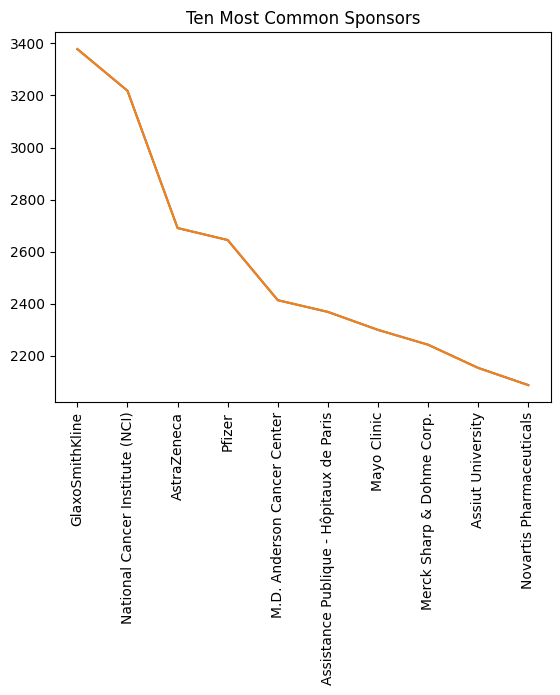

In [0]:
 # Visualizing the result

     
x = Sponsorfileroot1MapRDD.map(lambda a: a[0]).take(10)
y = Sponsorfileroot1MapRDD.map(lambda a: a[1]).take(10)
   # plotting the data
plt.plot(x, y)
   # Adding the title
plt.title("Ten Most Common Sponsors")
   # Adding the labels 
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()